# Projeto de Redes Sociais

Cicero Tiago Carneiro Valentim

Lais Nascimento da Silva

Thalia Loiola da Silva

William Augusto Reis da Silva

### Bibliotecas

In [1]:
from graph_tool import centrality, clustering, PropertyMap
from graph_tool import Graph
# from graph_tool.all import graph_draw
from netpixi.data.gt import *
from netpixi import render, peek
import netpixi
import pandas as pd
import netpixi
import numpy as np

Às vezes é necessário instalar o openpyxl. Só descomentar:

In [2]:
# !pip install openpyxl

Lendo o dataset e tirando quando tem valores nulos.

Recorte por anos.

In [3]:
df = pd.read_excel('netflix.xlsx')
df.head(2)
df = df.dropna(subset=['Genre'])

initial_date = np.datetime64('2000-01-01')
final_date = np.datetime64('2007-01-01')

df = df[(df['Release Date'] > initial_date) & (df['Release Date'] < final_date)]
df = df.reset_index()

In [4]:
LISTA_TITLES = []
lista_number = []
titles_ind = {}
for i in range(len(df)):
    if df.loc[i]["Title"] not in LISTA_TITLES:
        LISTA_TITLES.append(df.loc[i]["Title"])
        titles_ind[df.loc[i]["Title"]] = 1
        lista_number.append(1)
        
    else:
        titles_ind[df.loc[i]["Title"]] += 1
        lista_number.append(titles_ind.get(df.loc[i]["Title"]))

In [5]:
len(LISTA_TITLES)

1016

In [6]:
df["qtde"] = lista_number

In [7]:
df = df[df["qtde"] == 1]
df = df.reset_index()

In [8]:
# df = pd.DataFrame(df)
for linha in range(df.shape[0]):
    df['Genre'].loc[linha] = [genre.strip() for genre in df['Genre'].loc[linha].split(",")] 

In [9]:
titles = df["Title"]
titles

0                                              The Closet
1                                                    Sway
2                                              The Return
3                                      Intimate Strangers
4                                              Overcoming
                              ...                        
1011                Spy Kids 2: The Island of Lost Dreams
1012    InuYasha: The Movie 2: The Castle Beyond the L...
1013                                   Two and a Half Men
1014                                       50 First Dates
1015                                       13 Going on 30
Name: Title, Length: 1016, dtype: object

In [10]:
df

,level_0,index,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,...,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site,qtde
0,0,17,The Closet,[Comedy],"Korean Movies,Horror Movies,Mysteries",French,Movie,3.8,South Korea,1-2 hour,...,"Miramax, Gaumont",https://www.netflix.com/watch/81405032,https://www.imdb.com/title/tt0243493,A recent widowers move into a new house takes ...,16657.0,https://occ-0-395-988.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BMGRmNz...,https://www.youtube.com/watch?v=ou9YG0fUztA,YouTube,1
1,1,20,Sway,"[Crime, Drama]","Courtroom Dramas,Dramas,Mysteries,Japanese Movies",Japanese,Movie,8.5,Japan,1-2 hour,...,NaN,https://www.netflix.com/watch/70064321,https://www.imdb.com/title/tt0809535,When a Tokyo photographer returns home for his...,963.0,https://occ-0-993-988.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BN2QxMT...,https://www.youtube.com/watch?v=CZXzgt6NkhE,YouTube,1
2,2,43,The Return,[Drama],"Korean Movies,Dramas",Russian,Movie,4.1,South Korea,1-2 hour,...,Octagon Films,https://www.netflix.com/watch/81388058,https://www.imdb.com/title/tt0376968,An out-of-the-way makgeolli restaurant serves ...,42530.0,https://occ-0-1361-988.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BYmViZT...,https://www.youtube.com/watch?v=qNR4ER9tC6A,YouTube,1
3,3,49,Intimate Strangers,"[Drama, Romance, Thriller]","Korean Movies,Comedies",French,Movie,6.4,South Korea,1-2 hour,...,"Les Films Alain Sarde, France 2 Cinema",https://www.netflix.com/watch/81283663,https://www.imdb.com/title/tt0363532,"At a dinner party, longtime friends and their ...",4813.0,https://occ-0-1361-988.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BMTI1Mz...,https://www.youtube.com/watch?v=34YVqhsyDzA,YouTube,1
4,4,91,Overcoming,"[Documentary, Sport]","Sports Documentaries,Sports Movies,Danish Movi...","Danish, English, Italian, Spanish",Movie,8.7,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,...,Nordisk Film,https://www.netflix.com/watch/70254953,https://www.imdb.com/title/tt0465556,Tomas Gislasons documentary focuses on Bjarne ...,353.0,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BMjA2Nj...,https://www.youtube.com/watch?v=BGyieGVn4P4,YouTube,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,1025,9393,Spy Kids 2: The Island of Lost Dreams,"[Action, Adventure, Comedy, Family, Sci-Fi]","Family Features,Family Comedies,Family Adventu...",English,Movie,3.2,Canada,1-2 hour,...,"Dimension Films, Troublemaker Studios",https://www.netflix.com/watch/60023618,https://www.imdb.com/title/tt0287717,Spy kids Carmen and and Juni Cortez team up wi...,61045.0,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...,https://images-na.ssl-images-amazon.com/images...,https://www.youtube.com/watch?v=RLkRbj8sv8E,YouTube,1
1012,1026,9397,InuYasha: The Movie 2: The Castle Beyond the L...,"[Action, Animation, Comedy, Romance]","Anime,Anime Fantasies,Anime Action Films,Actio...","Japanese, English",Movie,8.2,"South Korea,United States,Italy",1-2 hour,...,"Sunrise, Yomiuri Telecasting Corporation",https://www.netflix.com/watch/70018513,https://www.imdb.com/title/tt0366621,"With their biggest foe seemingly defeated, Inu...",1911.0,https://occ-0-2773-2774.1.nflxso.net/dnm/api/v...,https://images-na.ssl-images-amazon.com/images...,https://www.youtube.com/watch?v=NWkJGr63n38,YouTube,1
1013,1027,9401,Two and a Half Men,"[Comedy, Romance]","TV Comedies,US TV Programmes,TV Programmes",English,Series,3.5,India,< 30 minutes,...,NaN,https://www.netflix.com/watch/70143822,https://www.imdb.com/title/tt0369179,Bachelor Charlies womanizing ways are hindered...,241338.0,https://occ-0-2042-299.1.nflxso.net/dnm/api/v6...,https://images-na.ssl-images-amazon.com/images...,https://www.youtube.com/watch?v=mVHDanSl2pc,YouTube,1
1014,1028,9

In [11]:
df = df.explode('Genre')
df = df.reset_index(drop=True)

In [12]:
df

,level_0,index,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,...,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site,qtde
0,0,17,The Closet,Comedy,"Korean Movies,Horror Movies,Mysteries",French,Movie,3.8,South Korea,1-2 hour,...,"Miramax, Gaumont",https://www.netflix.com/watch/81405032,https://www.imdb.com/title/tt0243493,A recent widowers move into a new house takes ...,16657.0,https://occ-0-395-988.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BMGRmNz...,https://www.youtube.com/watch?v=ou9YG0fUztA,YouTube,1
1,1,20,Sway,Crime,"Courtroom Dramas,Dramas,Mysteries,Japanese Movies",Japanese,Movie,8.5,Japan,1-2 hour,...,NaN,https://www.netflix.com/watch/70064321,https://www.imdb.com/title/tt0809535,When a Tokyo photographer returns home for his...,963.0,https://occ-0-993-988.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BN2QxMT...,https://www.youtube.com/watch?v=CZXzgt6NkhE,YouTube,1
2,1,20,Sway,Drama,"Courtroom Dramas,Dramas,Mysteries,Japanese Movies",Japanese,Movie,8.5,Japan,1-2 hour,...,NaN,https://www.netflix.com/watch/70064321,https://www.imdb.com/title/tt0809535,When a Tokyo photographer returns home for his...,963.0,https://occ-0-993-988.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BN2QxMT...,https://www.youtube.com/watch?v=CZXzgt6NkhE,YouTube,1
3,2,43,The Return,Drama,"Korean Movies,Dramas",Russian,Movie,4.1,South Korea,1-2 hour,...,Octagon Films,https://www.netflix.com/watch/81388058,https://www.imdb.com/title/tt0376968,An out-of-the-way makgeolli restaurant serves ...,42530.0,https://occ-0-1361-988.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BYmViZT...,https://www.youtube.com/watch?v=qNR4ER9tC6A,YouTube,1
4,3,49,Intimate Strangers,Drama,"Korean Movies,Comedies",French,Movie,6.4,South Korea,1-2 hour,...,"Les Films Alain Sarde, France 2 Cinema",https://www.netflix.com/watch/81283663,https://www.imdb.com/title/tt0363532,"At a dinner party, longtime friends and their ...",4813.0,https://occ-0-1361-988.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BMTI1Mz...,https://www.youtube.com/watch?v=34YVqhsyDzA,YouTube,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3072,1028,9411,50 First Dates,Drama,"Romantic Favourites,Romantic Comedies,Comedies...","English, Hawaiian, Mandarin",Movie,2.7,"Hong Kong,South Korea,Japan,United Kingdom,Tha...",1-2 hour,...,"Columbia Pictures Corporation, Flower Films, A...",https://www.netflix.com/watch/60033311,https://www.imdb.com/title/tt0343660,After falling for a pretty art teacher who has...,327916.0,https://occ-0-138-38.1.nflxso.net/dnm/api/v6/e...,https://images-na.ssl-images-amazon.com/images...,https://www.youtube.com/watch?v=Q_2AbjYeSMI,YouTube,1
3073,1028,9411,50 First Dates,Romance,"Romantic Favourites,Romantic Comedies,Comedies...","English, Hawaiian, Mandarin",Movie,2.7,"Hong Kong,South Korea,Japan,United Kingdom,Tha...",1-2 hour,...,"Columbia Pictures Corporation, Flower Films, A...",https://www.netflix.com/watch/60033311,https://www.imdb.com/title/tt0343660,After falling for a pretty art teacher who has...,327916.0,https://occ-0-138-38.1.nflxso.net/dnm/api/v6/e...,https://images-na.ssl-images-amazon.com/images...,https://www.youtube.com/watch?v=Q_2AbjYeSMI,YouTube,1
3074,1029,9420,13 Going on 30,Comedy,"Romantic Comedies,Comedies,Romantic Films,Roma...","English, Portuguese",Movie,3.1,"Hungary,Lithuania,Romania,United Kingdom,Belgi...",1-2 hour,...,"Revolution Studios, Thirteen Productions LLC",https://www.netflix.com/watch/60034573,https://www.imdb.com/title/tt0337563,When a geeky teens birthday party goes awry an...,167842.0,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...,https://images-na.ssl-images-amazon.com/images...,https://www.youtube.com/watch?v=SApIKVq1iJQ,YouTube,1
3075,1029,9420,13 Going on 30,Fantasy,"Romantic Comedies,Comedies,Romantic Fil

In [13]:
# pega todos os generos existentes do dataset 
genres = set()
for genre in df.Genre:
    genres.add(genre)

# transforma em lista 
genres = list(genres)

In [14]:
df.head(3)

,level_0,index,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,...,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site,qtde
0,0,17,The Closet,Comedy,"Korean Movies,Horror Movies,Mysteries",French,Movie,3.8,South Korea,1-2 hour,...,"Miramax, Gaumont",https://www.netflix.com/watch/81405032,https://www.imdb.com/title/tt0243493,A recent widowers move into a new house takes ...,16657.0,https://occ-0-395-988.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BMGRmNz...,https://www.youtube.com/watch?v=ou9YG0fUztA,YouTube,1
1,1,20,Sway,Crime,"Courtroom Dramas,Dramas,Mysteries,Japanese Movies",Japanese,Movie,8.5,Japan,1-2 hour,...,NaN,https://www.netflix.com/watch/70064321,https://www.imdb.com/title/tt0809535,When a Tokyo photographer returns home for his...,963.0,https://occ-0-993-988.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BN2QxMT...,https://www.youtube.com/watch?v=CZXzgt6NkhE,YouTube,1
2,1,20,Sway,Drama,"Courtroom Dramas,Dramas,Mysteries,Japanese Movies",Japanese,Movie,8.5,Japan,1-2 hour,...,NaN,https://www.netflix.com/watch/70064321,https://www.imdb.com/title/tt0809535,When a Tokyo photographer returns home for his...,963.0,https://occ-0-993-988.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BN2QxMT...,https://www.youtube.com/watch?v=CZXzgt6NkhE,YouTube,1


## Vértices

In [15]:
g = Graph(directed=False)
g.vp['name'] = g.new_vp('object')
g.vp['bipartite'] = g.new_vp('object')

for i in range(len(titles)):
    g.add_vertex()
    g.vp['name'][i] = str(titles[i])
    g.vp['bipartite'][i] = 0

print('número de vértices de g:', g.num_vertices())

número de vértices de g: 1016


In [16]:
len(genres) + len(titles)

1042

In [17]:
for i in range(len(genres)):
    g.add_vertex()
    g.vp['name'][i + len(titles)] = str(genres[i])
    g.vp['bipartite'][i + len(titles)] = 1
    
print('número de vértices de g total:', g.num_vertices())

número de vértices de g total: 1042


In [18]:
for v in g.vertices():
    print(g.vp['name'][v])

The Closet
Sway
The Return
Intimate Strangers
Overcoming
Awara Paagal Deewana
The Flower of Evil
Mr. & Mrs. Incredible
Golden Chicken
Dont be the First one
A Febre
As Seen On Tv
The Magician
Breaking News
Dinner With Friends
Cromartie High School
Beneath Clouds
Infamous
Summerland
When Louis Met... Chris Eubank
Gangaajal
BluffMaster!
Apaharan
Dead Run
Turtles Swim Faster Than Expected
Confession of Pain
Butterfly
Evils Wave
Dewi
The Desire
Love Song
We Can Be Heroes
The Guys
Spiral
Women vs. Men
The Challenge
Fat Pizza
Ranczo
Crackerjack
Entrusted
Up in the Sky
Deck the Halls
The Return of the Condor Heroes
Heroes
Morning Express
Masters Of The Sea
Immortal Love
Me & You vs The World
Babel
The Grooms Price
Friends Of Friends
The Room
Godzilla: Tokyo S.O.S.
Godzilla, Mothra and King Ghidorah: Giant Monsters All Out Attack
Godzilla Against Mechagodzilla
Godzilla vs. Megaguirus
Respiro
The Embalmer
Consequences of Love
Scent of Love
You Are My Sunshine
Distance
City Sharks
All About the B

Are We There Yet?
Its Always Sunny in Philadelphia
Eureka Seven
Battle Royale 2
Ju-On 2
Open Water 2: Adrift
Edge of Seventeen
Tell No One
District 13
Mulholland Dr.
The Cat Returns
My Big Fat Greek Wedding
Whats the Worst That Could Happen?
Carandiru
Hidden (Cache)
Harold and Kumar Get the Munchies
Secretary
Stromberg
Ray
Shes the Man
Super Size Me
Memento
Lammbock
The Island
Silent Hill
Herr Lehmann
Hellsing
Trigun
Full Metal Panic!
The Hills Have Eyes
Ein Freund von mir
Eragon
Shaun of the Dead
The Edukators
The Pianist
Samurai Champloo
The IT Crowd
The Backyardigans
Bleach: Memories of Nobody: The Movie
Master and Commander: The Far Side of the World
Love Actually
Charlies Angels: Full Throttle
O Brother, Where Art Thou?
Its a Boy Girl Thing
The Aviator
Dragon Ball Z: The Return of Cooler
V for Vendetta
Scary Movie 4
Dragon Ball Z: Lord Slug
Saw III
Saw II
One Hour Photo
The Motorcycle Diaries
Wrong Turn
Weeds
Unaccompanied Minors
Underworld
The Sweetest Thing
Sahara
Sideways
Scoop

In [19]:
lista = []
for linha in range(df.shape[0]):
    title = df['Title'].loc[linha]
    genre = df['Genre'].loc[linha]
    index_title = 0
    index_genre = 0
    v = 0
    while v < g.num_vertices() - len(genres):
        if str(g.vp['name'][v]) == str(title):
            index_title = v
            break
        v += 1
    u = len(titles)
    while u < g.num_vertices():
        if str(g.vp['name'][u]) == str(genre):
            index_genre = u
            break
        u += 1
    print(f"{title}: {index_title}, {genre}: {index_genre}")
    together = []
    together.append(index_title)
    together.append(index_genre)
    if together not in lista:
        lista.append(together)

The Closet: 0, Comedy: 1020
Sway: 1, Crime: 1030
Sway: 1, Drama: 1033
The Return: 2, Drama: 1033
Intimate Strangers: 3, Drama: 1033
Intimate Strangers: 3, Romance: 1031
Intimate Strangers: 3, Thriller: 1023
Overcoming: 4, Documentary: 1024
Overcoming: 4, Sport: 1016
Awara Paagal Deewana: 5, Action: 1034
Awara Paagal Deewana: 5, Comedy: 1020
Awara Paagal Deewana: 5, Crime: 1030
Awara Paagal Deewana: 5, Drama: 1033
Awara Paagal Deewana: 5, Thriller: 1023
The Flower of Evil: 6, Drama: 1033
Mr. & Mrs. Incredible: 7, Action: 1034
Mr. & Mrs. Incredible: 7, Comedy: 1020
Mr. & Mrs. Incredible: 7, Crime: 1030
Mr. & Mrs. Incredible: 7, Thriller: 1023
Golden Chicken: 8, Drama: 1033
Golden Chicken: 8, Comedy: 1020
Dont be the First one: 9, Action: 1034
Dont be the First one: 9, Crime: 1030
Dont be the First one: 9, Thriller: 1023
A Febre: 10, Drama: 1033
A Febre: 10, History: 1027
A Febre: 10, Romance: 1031
As Seen On Tv: 11, Short: 1036
As Seen On Tv: 11, Comedy: 1020
The Magician: 12, Comedy: 10

The Woods: 137, Horror: 1038
The Woods: 137, Mystery: 1017
The Woods: 137, Thriller: 1023
Dont Crack Under Pressure III: 138, Action: 1034
Dont Crack Under Pressure III: 138, Crime: 1030
Dont Crack Under Pressure III: 138, Thriller: 1023
Dont Crack Under Pressure II: 139, Action: 1034
Dont Crack Under Pressure II: 139, Crime: 1030
Dont Crack Under Pressure II: 139, Thriller: 1023
Dont Crack Under Pressure: 140, Action: 1034
Dont Crack Under Pressure: 140, Crime: 1030
Dont Crack Under Pressure: 140, Thriller: 1023
Fafner in the Azure: 141, Animation: 1029
Fafner in the Azure: 141, Action: 1034
Fafner in the Azure: 141, Drama: 1033
Fafner in the Azure: 141, Sci-Fi: 1025
Top Chef: 142, Game-Show: 1032
Top Chef: 142, Reality-TV: 1018
Night: 143, Adventure: 1039
Night: 143, Comedy: 1020
Night: 143, Family: 1028
Night: 143, Fantasy: 1021
Berlin, Berlin: 144, Comedy: 1020
Berlin, Berlin: 144, Drama: 1033
Berlin, Berlin: 144, Romance: 1031
What Are the Odds?: 145, Short: 1036
What Are the Odds

Save the Green Planet!: 233, Sci-Fi: 1025
Save the Green Planet!: 233, Thriller: 1023
Righteous Ties: 234, Comedy: 1020
Righteous Ties: 234, Crime: 1030
Righteous Ties: 234, Drama: 1033
The King and the Clown: 235, Drama: 1033
The King and the Clown: 235, History: 1027
Public Enemy: 236, Action: 1034
The Unforgiven: 237, Drama: 1033
Silmido: 238, Action: 1034
Silmido: 238, Drama: 1033
The Classic: 239, Drama: 1033
The Classic: 239, Romance: 1031
R-Point: 240, Action: 1034
R-Point: 240, Horror: 1038
R-Point: 240, War: 1041
My Tutor Friend: 241, Comedy: 1020
My Tutor Friend: 241, Romance: 1031
A Good Lawyers Wife: 242, Drama: 1033
A Good Lawyers Wife: 242, Romance: 1031
All for Love: 243, Drama: 1033
A Dirty Carnival: 244, Action: 1034
A Dirty Carnival: 244, Crime: 1030
A Dirty Carnival: 244, Drama: 1033
Jail Breakers: 245, Action: 1034
Jail Breakers: 245, Comedy: 1020
Arahan: 246, Action: 1034
Arahan: 246, Comedy: 1020
Blood Rain: 247, Mystery: 1017
Blood Rain: 247, Thriller: 1023
Kick 

Beyond the Mat: 307, Biography: 1019
Beyond the Mat: 307, Sport: 1016
Hearts in Atlantis: 308, Drama: 1033
Hearts in Atlantis: 308, Mystery: 1017
Phir Hera Pheri: 309, Comedy: 1020
Phir Hera Pheri: 309, Crime: 1030
Proof of Life: 310, Action: 1034
Proof of Life: 310, Drama: 1033
Proof of Life: 310, Thriller: 1023
Ishq Vishk: 311, Comedy: 1020
Ishq Vishk: 311, Romance: 1031
The Slayers: 312, Animation: 1029
The Slayers: 312, Action: 1034
The Slayers: 312, Adventure: 1039
The Slayers: 312, Comedy: 1020
The Slayers: 312, Drama: 1033
The Slayers: 312, Fantasy: 1021
The Legend of Bhagat Singh: 313, Action: 1034
The Legend of Bhagat Singh: 313, Biography: 1019
The Legend of Bhagat Singh: 313, Drama: 1033
The Legend of Bhagat Singh: 313, History: 1027
Saint Seiya: 314, Animation: 1029
Saint Seiya: 314, Action: 1034
Saint Seiya: 314, Adventure: 1039
Saint Seiya: 314, Drama: 1033
Saint Seiya: 314, Fantasy: 1021
Saint Seiya: 314, Sci-Fi: 1025
Yamakasi: 315, Action: 1034
Yamakasi: 315, Drama: 103

Cure: 452, Crime: 1030
Cure: 452, Horror: 1038
Cure: 452, Mystery: 1017
Cure: 452, Thriller: 1023
Josee, the Tiger and the Fish: 453, Drama: 1033
Josee, the Tiger and the Fish: 453, Romance: 1031
A Moment to Remember: 454, Drama: 1033
A Moment to Remember: 454, Romance: 1031
Pitch Black: 455, Action: 1034
Pitch Black: 455, Horror: 1038
Pitch Black: 455, Sci-Fi: 1025
Pitch Black: 455, Thriller: 1023
Infernal Affairs 3: 456, Action: 1034
Infernal Affairs 3: 456, Crime: 1030
Infernal Affairs 3: 456, Drama: 1033
Infernal Affairs 3: 456, Thriller: 1023
Infernal Affairs 2: 457, Action: 1034
Infernal Affairs 2: 457, Crime: 1030
Infernal Affairs 2: 457, Drama: 1033
Infernal Affairs 2: 457, Thriller: 1023
Unfair: 458, Mystery: 1017
Pacchigi!: 459, Action: 1034
Pacchigi!: 459, Comedy: 1020
Pacchigi!: 459, Drama: 1033
Pacchigi!: 459, Romance: 1031
Ping Pong: 460, Comedy: 1020
Ping Pong: 460, Drama: 1033
Ping Pong: 460, Sport: 1016
Memories of Tomorrow: 461, Drama: 1033
Uchoten Hotel: 462, Comedy:

Kiss of the Dragon: 528, Drama: 1033
Kiss of the Dragon: 528, Thriller: 1023
How High: 529, Comedy: 1020
How High: 529, Fantasy: 1021
Ultimate Force: 530, Action: 1034
Ultimate Force: 530, War: 1041
Walking with Dinosaurs: Land of the Giants: 531, Documentary: 1024
Walking with Dinosaurs: Land of the Giants: 531, Short: 1036
Dreamgirls: 532, Drama: 1033
Dreamgirls: 532, Music: 1040
Dreamgirls: 532, Musical: 1037
Black Books: 533, Comedy: 1020
Walking with Dinosaurs: The Ballad of Big Al: 534, Documentary: 1024
Walking with Dinosaurs: The Ballad of Big Al: 534, Adventure: 1039
House of 1,000 Corpses: 535, Horror: 1038
Like Mike: 536, Comedy: 1020
Like Mike: 536, Family: 1028
Like Mike: 536, Fantasy: 1021
Like Mike: 536, Sport: 1016
Zathura: 537, Action: 1034
Zathura: 537, Adventure: 1039
Zathura: 537, Comedy: 1020
Zathura: 537, Family: 1028
Zathura: 537, Fantasy: 1021
Zathura: 537, Sci-Fi: 1025
Shutter: 538, Horror: 1038
Shutter: 538, Mystery: 1017
Shutter: 538, Thriller: 1023
Reprise: 

The Covenant: 621, Horror: 1038
The Covenant: 621, Mystery: 1017
The Covenant: 621, Thriller: 1023
Dr. Seuss The Cat in the Hat: 622, Adventure: 1039
Dr. Seuss The Cat in the Hat: 622, Comedy: 1020
Dr. Seuss The Cat in the Hat: 622, Family: 1028
Dr. Seuss The Cat in the Hat: 622, Fantasy: 1021
The Boondock Saints: 623, Action: 1034
The Boondock Saints: 623, Crime: 1030
The Boondock Saints: 623, Thriller: 1023
The Fast and the Furious: 624, Action: 1034
The Fast and the Furious: 624, Crime: 1030
The Fast and the Furious: 624, Thriller: 1023
Seed of Chucky: 625, Comedy: 1020
Seed of Chucky: 625, Fantasy: 1021
Seed of Chucky: 625, Horror: 1038
Seed of Chucky: 625, Thriller: 1023
Two Weeks Notice: 626, Comedy: 1020
Two Weeks Notice: 626, Romance: 1031
2 Fast 2 Furious: 627, Action: 1034
2 Fast 2 Furious: 627, Crime: 1030
2 Fast 2 Furious: 627, Thriller: 1023
Assault on Precinct 13: 628, Action: 1034
Assault on Precinct 13: 628, Crime: 1030
Assault on Precinct 13: 628, Drama: 1033
Assault o

Full Metal Panic!: 701, Animation: 1029
The Hills Have Eyes: 702, Action: 1034
The Hills Have Eyes: 702, Adventure: 1039
The Hills Have Eyes: 702, Horror: 1038
The Hills Have Eyes: 702, Thriller: 1023
Ein Freund von mir: 703, Comedy: 1020
Ein Freund von mir: 703, Drama: 1033
Eragon: 704, Action: 1034
Eragon: 704, Adventure: 1039
Eragon: 704, Family: 1028
Eragon: 704, Fantasy: 1021
Shaun of the Dead: 705, Comedy: 1020
Shaun of the Dead: 705, Horror: 1038
The Edukators: 706, Drama: 1033
The Edukators: 706, Romance: 1031
The Pianist: 707, Biography: 1019
The Pianist: 707, Drama: 1033
The Pianist: 707, Music: 1040
The Pianist: 707, War: 1041
Samurai Champloo: 708, Animation: 1029
Samurai Champloo: 708, Action: 1034
Samurai Champloo: 708, Adventure: 1039
Samurai Champloo: 708, Comedy: 1020
Samurai Champloo: 708, Drama: 1033
Samurai Champloo: 708, Thriller: 1023
The IT Crowd: 709, Comedy: 1020
The Backyardigans: 710, Animation: 1029
The Backyardigans: 710, Adventure: 1039
The Backyardigans: 

The Big Bang Theory: 784, Romance: 1031
Wallace and Gromit: The Curse of the Were-Rabbit: 785, Action: 1034
Wallace and Gromit: The Curse of the Were-Rabbit: 785, Adventure: 1039
Wallace and Gromit: The Curse of the Were-Rabbit: 785, Fantasy: 1021
A.I. Artificial Intelligence: 786, Drama: 1033
A.I. Artificial Intelligence: 786, Sci-Fi: 1025
Aquamarine: 787, Comedy: 1020
Aquamarine: 787, Family: 1028
Aquamarine: 787, Fantasy: 1021
Aquamarine: 787, Romance: 1031
A History of Violence: 788, Drama: 1033
A History of Violence: 788, Thriller: 1023
Good Night, and Good Luck: 789, Biography: 1019
Good Night, and Good Luck: 789, Drama: 1033
Good Night, and Good Luck: 789, History: 1027
A Knights Tale: 790, Action: 1034
A Knights Tale: 790, Adventure: 1039
A Knights Tale: 790, Romance: 1031
Anger Management: 791, Comedy: 1020
Not Another Teen Movie: 792, Comedy: 1020
A Cinderella Story: 793, Comedy: 1020
A Cinderella Story: 793, Family: 1028
A Cinderella Story: 793, Romance: 1031
The New Adventu

Barnyard: 862, Comedy: 1020
Barnyard: 862, Drama: 1033
Barnyard: 862, Family: 1028
Prison Break: 863, Action: 1034
Prison Break: 863, Crime: 1030
Prison Break: 863, Drama: 1033
Prison Break: 863, Mystery: 1017
Prison Break: 863, Thriller: 1023
The Bourne Identity: 864, Action: 1034
The Bourne Identity: 864, Mystery: 1017
The Bourne Identity: 864, Thriller: 1023
The SpongeBob SquarePants Movie: 865, Animation: 1029
The SpongeBob SquarePants Movie: 865, Action: 1034
The SpongeBob SquarePants Movie: 865, Adventure: 1039
The SpongeBob SquarePants Movie: 865, Comedy: 1020
The SpongeBob SquarePants Movie: 865, Family: 1028
The SpongeBob SquarePants Movie: 865, Fantasy: 1021
The Bourne Supremacy: 866, Action: 1034
The Bourne Supremacy: 866, Mystery: 1017
The Bourne Supremacy: 866, Thriller: 1023
Anchorman: The Legend of Ron Burgundy: 867, Comedy: 1020
Dodgeball: A True Underdog Story: 868, Comedy: 1020
Dodgeball: A True Underdog Story: 868, Sport: 1016
Along Came a Spider: 869, Drama: 1033
Al

The Fairly OddParents: 940, Comedy: 1020
The Fairly OddParents: 940, Family: 1028
The Fairly OddParents: 940, Fantasy: 1021
Girl with a Pearl Earring: 941, Biography: 1019
Girl with a Pearl Earring: 941, Drama: 1033
Girl with a Pearl Earring: 941, Romance: 1031
Elf: 942, Adventure: 1039
Elf: 942, Comedy: 1020
Elf: 942, Family: 1028
Elf: 942, Fantasy: 1021
Elf: 942, Romance: 1031
Enough: 943, Crime: 1030
Enough: 943, Drama: 1033
Enough: 943, Thriller: 1023
The Lord of the Rings: The Return of the King: 944, Action: 1034
The Lord of the Rings: The Return of the King: 944, Adventure: 1039
The Lord of the Rings: The Return of the King: 944, Drama: 1033
The Lord of the Rings: The Return of the King: 944, Fantasy: 1021
Divine Secrets of the Ya-Ya Sisterhood: 945, Drama: 1033
Training Day: 946, Crime: 1030
Training Day: 946, Drama: 1033
Training Day: 946, Thriller: 1023
Walking with Dinosaurs: 947, Documentary: 1024
Walking with Dinosaurs: 947, Animation: 1029
Walking with Dinosaurs: 947, His

Bad Boys II: 1009, Action: 1034
Bad Boys II: 1009, Comedy: 1020
Bad Boys II: 1009, Crime: 1030
Bad Boys II: 1009, Thriller: 1023
Scary Movie 2: 1010, Comedy: 1020
Scary Movie 2: 1010, Horror: 1038
Spy Kids 2: The Island of Lost Dreams: 1011, Action: 1034
Spy Kids 2: The Island of Lost Dreams: 1011, Adventure: 1039
Spy Kids 2: The Island of Lost Dreams: 1011, Comedy: 1020
Spy Kids 2: The Island of Lost Dreams: 1011, Family: 1028
Spy Kids 2: The Island of Lost Dreams: 1011, Sci-Fi: 1025
InuYasha: The Movie 2: The Castle Beyond the Looking Glass: 1012, Action: 1034
InuYasha: The Movie 2: The Castle Beyond the Looking Glass: 1012, Animation: 1029
InuYasha: The Movie 2: The Castle Beyond the Looking Glass: 1012, Comedy: 1020
InuYasha: The Movie 2: The Castle Beyond the Looking Glass: 1012, Romance: 1031
Two and a Half Men: 1013, Comedy: 1020
Two and a Half Men: 1013, Romance: 1031
50 First Dates: 1014, Comedy: 1020
50 First Dates: 1014, Drama: 1033
50 First Dates: 1014, Romance: 1031
13 Goi

In [20]:
len(lista)
for i in lista:
    print(i)
    g.add_edge(i[0], i[1])
#     g.add_edge(i[0], i[1], add_missing=False)

[0, 1020]
[1, 1030]
[1, 1033]
[2, 1033]
[3, 1033]
[3, 1031]
[3, 1023]
[4, 1024]
[4, 1016]
[5, 1034]
[5, 1020]
[5, 1030]
[5, 1033]
[5, 1023]
[6, 1033]
[7, 1034]
[7, 1020]
[7, 1030]
[7, 1023]
[8, 1033]
[8, 1020]
[9, 1034]
[9, 1030]
[9, 1023]
[10, 1033]
[10, 1027]
[10, 1031]
[11, 1036]
[11, 1020]
[12, 1020]
[12, 1033]
[13, 1034]
[13, 1030]
[13, 1033]
[14, 1020]
[14, 1033]
[14, 1031]
[15, 1029]
[15, 1020]
[16, 1033]
[16, 1031]
[17, 1019]
[17, 1030]
[17, 1033]
[18, 1033]
[19, 1024]
[20, 1034]
[20, 1030]
[20, 1033]
[21, 1020]
[21, 1030]
[21, 1033]
[21, 1031]
[21, 1023]
[22, 1034]
[22, 1030]
[22, 1033]
[23, 1033]
[24, 1020]
[25, 1030]
[25, 1033]
[25, 1023]
[26, 1033]
[27, 1033]
[28, 1033]
[28, 1017]
[29, 1031]
[29, 1033]
[29, 1017]
[30, 1033]
[30, 1031]
[31, 1020]
[32, 1033]
[33, 1030]
[33, 1033]
[33, 1017]
[34, 1020]
[35, 1039]
[35, 1020]
[35, 1028]
[36, 1034]
[36, 1039]
[36, 1020]
[36, 1030]
[36, 1023]
[37, 1020]
[38, 1020]
[38, 1016]
[39, 1033]
[39, 1023]
[40, 1024]
[40, 1027]
[41, 1020]
[

[304, 1019]
[304, 1033]
[304, 1031]
[305, 1033]
[305, 1016]
[305, 1023]
[305, 1041]
[306, 1034]
[306, 1039]
[306, 1021]
[306, 1038]
[306, 1031]
[306, 1023]
[307, 1024]
[307, 1019]
[307, 1016]
[308, 1033]
[308, 1017]
[309, 1020]
[309, 1030]
[310, 1034]
[310, 1033]
[310, 1023]
[311, 1020]
[311, 1031]
[312, 1029]
[312, 1034]
[312, 1039]
[312, 1020]
[312, 1033]
[312, 1021]
[313, 1034]
[313, 1019]
[313, 1033]
[313, 1027]
[314, 1029]
[314, 1034]
[314, 1039]
[314, 1033]
[314, 1021]
[314, 1025]
[315, 1034]
[315, 1033]
[315, 1030]
[316, 1029]
[316, 1025]
[317, 1034]
[317, 1030]
[317, 1033]
[317, 1017]
[317, 1023]
[318, 1020]
[318, 1030]
[319, 1034]
[319, 1020]
[319, 1030]
[320, 1033]
[321, 1029]
[321, 1033]
[321, 1025]
[321, 1041]
[322, 1034]
[322, 1020]
[322, 1031]
[323, 1034]
[323, 1020]
[323, 1033]
[324, 1020]
[324, 1031]
[325, 1019]
[325, 1033]
[325, 1027]
[326, 1030]
[326, 1033]
[326, 1031]
[327, 1039]
[327, 1033]
[327, 1028]
[328, 1030]
[328, 1038]
[328, 1023]
[329, 1017]
[329, 1023]
[330

[558, 1021]
[558, 1023]
[559, 1034]
[559, 1033]
[560, 1029]
[560, 1034]
[560, 1020]
[560, 1021]
[560, 1025]
[561, 1033]
[561, 1027]
[562, 1033]
[563, 1029]
[563, 1036]
[563, 1030]
[563, 1033]
[564, 1020]
[564, 1033]
[565, 1020]
[565, 1031]
[566, 1036]
[566, 1030]
[567, 1036]
[567, 1030]
[568, 1039]
[568, 1019]
[568, 1033]
[568, 1027]
[569, 1039]
[569, 1019]
[569, 1033]
[569, 1027]
[570, 1020]
[570, 1033]
[571, 1038]
[571, 1017]
[571, 1023]
[572, 1024]
[572, 1036]
[572, 1019]
[573, 1033]
[574, 1020]
[574, 1031]
[575, 1038]
[575, 1023]
[576, 1034]
[576, 1039]
[576, 1038]
[576, 1025]
[576, 1023]
[577, 1034]
[577, 1030]
[577, 1033]
[577, 1023]
[578, 1020]
[578, 1033]
[579, 1020]
[580, 1020]
[581, 1034]
[581, 1019]
[581, 1033]
[581, 1027]
[581, 1041]
[582, 1033]
[583, 1024]
[584, 1019]
[584, 1033]
[584, 1016]
[585, 1034]
[585, 1039]
[585, 1020]
[585, 1028]
[585, 1021]
[585, 1025]
[586, 1034]
[586, 1039]
[586, 1038]
[586, 1023]
[587, 1034]
[587, 1030]
[587, 1033]
[588, 1034]
[588, 1039]
[588

[909, 1023]
[910, 1029]
[910, 1039]
[910, 1020]
[910, 1028]
[910, 1021]
[911, 1034]
[911, 1020]
[911, 1030]
[911, 1023]
[912, 1029]
[912, 1034]
[912, 1039]
[912, 1020]
[912, 1021]
[913, 1034]
[913, 1020]
[913, 1021]
[914, 1034]
[914, 1025]
[915, 1020]
[915, 1033]
[915, 1031]
[915, 1041]
[916, 1034]
[916, 1039]
[916, 1025]
[917, 1020]
[918, 1034]
[918, 1030]
[918, 1033]
[919, 1020]
[919, 1031]
[920, 1020]
[920, 1030]
[921, 1030]
[921, 1033]
[921, 1017]
[921, 1025]
[922, 1033]
[922, 1017]
[922, 1031]
[922, 1023]
[923, 1034]
[923, 1039]
[923, 1020]
[923, 1028]
[923, 1025]
[924, 1030]
[924, 1033]
[924, 1023]
[925, 1034]
[925, 1039]
[925, 1020]
[925, 1023]
[926, 1034]
[926, 1033]
[926, 1017]
[926, 1025]
[927, 1017]
[927, 1023]
[928, 1019]
[928, 1033]
[928, 1027]
[928, 1041]
[929, 1019]
[929, 1033]
[930, 1029]
[930, 1020]
[930, 1028]
[930, 1021]
[930, 1017]
[931, 1019]
[931, 1030]
[931, 1033]
[931, 1016]
[932, 1029]
[932, 1034]
[932, 1020]
[932, 1025]
[933, 1019]
[933, 1033]
[934, 1039]
[934

In [21]:
for u in g.vertices():
    print(f'vizinhos de {g.vp["name"][u]}:', end=' ')
    for v in u.all_neighbors():
        print(g.vp["name"][v], end=' ')
    print()

vizinhos de The Closet: Comedy 
vizinhos de Sway: Crime Drama 
vizinhos de The Return: Drama 
vizinhos de Intimate Strangers: Drama Romance Thriller 
vizinhos de Overcoming: Documentary Sport 
vizinhos de Awara Paagal Deewana: Action Comedy Crime Drama Thriller 
vizinhos de The Flower of Evil: Drama 
vizinhos de Mr. & Mrs. Incredible: Action Comedy Crime Thriller 
vizinhos de Golden Chicken: Drama Comedy 
vizinhos de Dont be the First one: Action Crime Thriller 
vizinhos de A Febre: Drama History Romance 
vizinhos de As Seen On Tv: Short Comedy 
vizinhos de The Magician: Comedy Drama 
vizinhos de Breaking News: Action Crime Drama 
vizinhos de Dinner With Friends: Comedy Drama Romance 
vizinhos de Cromartie High School: Animation Comedy 
vizinhos de Beneath Clouds: Drama Romance 
vizinhos de Infamous: Biography Crime Drama 
vizinhos de Summerland: Drama 
vizinhos de When Louis Met... Chris Eubank: Documentary 
vizinhos de Gangaajal: Action Crime Drama 
vizinhos de BluffMaster!: Comedy C

vizinhos de Memories of Matsuko: Comedy Drama Musical Mystery 
vizinhos de Kamikaze Girls: Comedy 
vizinhos de North Country: Drama 
vizinhos de Fist of the North Star: New Saviour Legend: Animation Action 
vizinhos de Scare Tactics: Comedy Horror Reality-TV Sci-Fi Thriller 
vizinhos de Paranoia Agent: Animation Drama Horror Mystery 
vizinhos de The Beast and the Beauty: Comedy Romance 
vizinhos de The End of Evangelion: Animation Action Drama Fantasy Sci-Fi 
vizinhos de The Legend of Buddha: Animation Family 
vizinhos de Revenge: Short Thriller 
vizinhos de One Fine Spring Day: Drama Romance 
vizinhos de The Big Swindle: Action Crime 
vizinhos de Romance of Their Own: Action Drama Romance 
vizinhos de Crying Fist: Action Drama Sport 
vizinhos de Il Mare: Drama Fantasy Romance 
vizinhos de Hazaaron Khwaishein Aisi: Drama 
vizinhos de Jhankaar Beats: Comedy Music Romance 
vizinhos de Men Behaving Badly: Comedy 
vizinhos de American Idol: Game-Show Music Reality-TV 
vizinhos de Cinema, A

vizinhos de Mobile Suit Gundam: The 08th MS Team: Animation Action Sci-Fi 
vizinhos de Ghost in the Shell: Stand Alone Complex: Animation Action Crime Sci-Fi Thriller 
vizinhos de Once in a Summer: Drama Romance 
vizinhos de I Spy: Action Adventure Comedy Thriller 
vizinhos de The Whole Nine Yards: Comedy Crime 
vizinhos de Battlefield Earth: Action Adventure Sci-Fi 
vizinhos de 200 Pounds Beauty: Comedy Drama Music Romance 
vizinhos de Tusenbröder - Återkomsten: Crime Drama Thriller 
vizinhos de Adaptation.: Comedy Drama 
vizinhos de Basilisk: Animation Drama Fantasy 
vizinhos de 20/30/40: Comedy Drama Music Romance Sport 
vizinhos de TAXi 3: Action Comedy Crime 
vizinhos de So Close: Action Crime Thriller 
vizinhos de The Art of War: Action Adventure Crime Thriller 
vizinhos de Robin-B-Hood: Action Adventure Comedy Crime Drama Family Thriller 
vizinhos de Riding Alone for Thousands of Miles: Drama 
vizinhos de The Road Home: Drama History Romance 
vizinhos de Warriors of Heaven and E

vizinhos de Steamboy: Animation Action Adventure Fantasy Sci-Fi Thriller 
vizinhos de The Holiday: Comedy Romance 
vizinhos de Grizzly Man: Documentary Biography 
vizinhos de The Texas Chainsaw Massacre: The Beginning: Horror Thriller 
vizinhos de Talladega Nights: The Ballad of Ricky Bobby: Comedy Sport 
vizinhos de Boogeyman: Drama Horror Mystery Thriller 
vizinhos de Undisputed: Action Crime Drama Sport 
vizinhos de Rene hjerter: Drama 
vizinhos de Mission to Mars: Adventure Sci-Fi Thriller 
vizinhos de What Lies Beneath: Drama Fantasy Horror Mystery Thriller 
vizinhos de Traffic: Crime Drama Thriller 
vizinhos de Riding in Cars with Boys: Biography Comedy Drama 
vizinhos de Rize: Documentary Music 
vizinhos de Land of the Dead: Horror Sci-Fi Thriller 
vizinhos de U-571: Action War 
vizinhos de 40 Days and 40 Nights: Comedy Romance 
vizinhos de Dragon Ball Z: Wrath of the Dragon: Animation Action Sci-Fi 
vizinhos de The Twilight Samurai: Drama History Romance 
vizinhos de QI: Comedy

vizinhos de Harold and Kumar Get the Munchies: Adventure Comedy 
vizinhos de Secretary: Comedy Drama Romance 
vizinhos de Stromberg: Comedy 
vizinhos de Ray: Biography Drama Music 
vizinhos de Shes the Man: Comedy Romance Sport 
vizinhos de Super Size Me: Documentary 
vizinhos de Memento: Mystery Thriller 
vizinhos de Lammbock: Comedy 
vizinhos de The Island: Action Sci-Fi Thriller 
vizinhos de Silent Hill: Action Adventure Fantasy Horror Mystery 
vizinhos de Herr Lehmann: Comedy Drama 
vizinhos de Hellsing: Animation Action Fantasy Horror 
vizinhos de Trigun: Animation Action Comedy Drama Sci-Fi 
vizinhos de Full Metal Panic!: Action Comedy Romance Sci-Fi Animation 
vizinhos de The Hills Have Eyes: Action Adventure Horror Thriller 
vizinhos de Ein Freund von mir: Comedy Drama 
vizinhos de Eragon: Action Adventure Family Fantasy 
vizinhos de Shaun of the Dead: Comedy Horror 
vizinhos de The Edukators: Drama Romance 
vizinhos de The Pianist: Biography Drama Music War 
vizinhos de Samura

vizinhos de Snatch: Comedy Crime 
vizinhos de Serendipity: Comedy Romance 
vizinhos de Supernatural: Drama Fantasy Horror Mystery Thriller 
vizinhos de What Women Want: Comedy Fantasy Romance 
vizinhos de The Mothman Prophecies: Drama Horror Mystery Thriller 
vizinhos de The Patriot: Action Drama History War 
vizinhos de The Punisher: Action Crime Drama Thriller 
vizinhos de Panic Room: Crime Drama Thriller 
vizinhos de Peter Pan: Adventure Family Fantasy Romance 
vizinhos de Tears of the Sun: Action Drama Thriller War 
vizinhos de XXX: State of the Union: Action Adventure Crime Sci-Fi Thriller 
vizinhos de Open Season: Animation Adventure Comedy Family Fantasy 
vizinhos de National Security: Action Comedy Crime Thriller 
vizinhos de Naruto: Animation Action Adventure Comedy Fantasy 
vizinhos de The Medallion: Action Comedy Fantasy 
vizinhos de Superman Returns: Action Sci-Fi 
vizinhos de Malena: Comedy Drama Romance War 
vizinhos de Spider-Man: Action Adventure Sci-Fi 
vizinhos de Sca

vizinhos de Comedy: The Closet Awara Paagal Deewana Mr. & Mrs. Incredible Golden Chicken As Seen On Tv The Magician Dinner With Friends Cromartie High School BluffMaster! Turtles Swim Faster Than Expected We Can Be Heroes Women vs. Men The Challenge Fat Pizza Ranczo Crackerjack Deck the Halls Masters Of The Sea City Sharks All About the Benjamins Scandalous Ouran High School Host Club Hold Up Down The Suit A Guy & A Girl One on One Half & Half Girlfriends Tortilla Soup 3 Non-Blondes Rocks White Teeth Code Lyoko A Kind of America The Last Shot I Not Stupid I Not Stupid Too Tchoupi Meet the Parents Cursed Cold Feet Freej Cicak-Man Incontrôlable Skřítek Night Berlin, Berlin What Are the Odds? Whats Up? Human Nature Perfect World Zaki Chan What to Do in Case of Fire Advertising Rules! City Hunter: .357 Magnum A Girls Tears The Death of Mr. Lazarescu My Neighbors the Yamadas Whisky Autumn Spring Tokyo Raiders 31 Minutos Honey and Clover Angel of the Lord Whats New Scooby-Doo? Dil Chahta Hai

vizinhos de Sci-Fi: Heroes Godzilla: Tokyo S.O.S. Godzilla, Mothra and King Ghidorah: Giant Monsters All Out Attack Godzilla Against Mechagodzilla Godzilla vs. Megaguirus Dragon Head Code Lyoko Cypher Miracles Stay Alive Cicak-Man Fafner in the Azure Scare Tactics The End of Evangelion Doraemon the Movie: Nobita in the Wan-Nyan Spacetime Odyssey Doraemon the Movie: Nobita and the Winged Brave Men Doraemon the Movie: Nobita and the Robot Kingdom Save the Green Planet! The Nutty Professor II: The Klumps Alien vs. Predator Stealth Mobile Suit Z Gundam: A New Translation - Heirs to the Stars Mobile Suit Z Gundam III: Love Is the Pulse of the Stars Kamen Rider 555: Paradise Lost Saint Seiya BLAME! Zipang Ergo Proxy Jason X Mobile Suit Gundam Seed Cowboy Bebop: The Movie The Vision of Escaflowne Mobile Suit Gundam 00 Mobile Suit Gundam 0083: Stardust Memory Mobile Suit Gundam: The 08th MS Team Ghost in the Shell: Stand Alone Complex Battlefield Earth I, Robot Mobile Suit Gundam Gantz The Mel

vizinhos de Romance: Intimate Strangers A Febre Dinner With Friends Beneath Clouds BluffMaster! The Desire Love Song The Return of the Condor Heroes Immortal Love Friends Of Friends The Embalmer Consequences of Love Scent of Love You Are My Sunshine Ouran High School Host Club Dresden A Guy & A Girl Half & Half Raising Victor Vargas Tortilla Soup Sleepless Nights Fida Dil A Kind of America The New World The Last Shot Be with Me Tchoupi Meet the Parents Sylvia Cold Feet Sugar Rush Vivah Wild Flowers Berlin, Berlin Whats Up? Zaki Chan What to Do in Case of Fire Advertising Rules! A Girls Tears The Guy in the Grave Next Door Pan Tadeusz Tokyo Raiders Honey and Clover Whats New Scooby-Doo? Lakshya Dil Chahta Hai Dark Blue World Out of the City Dear Dakanda Seasons Change The Beast and the Beauty One Fine Spring Day Romance of Their Own Il Mare Jhankaar Beats Pyaar Ke Side Effects Fat Choi Spirit Vampire Effect The Classic My Tutor Friend A Good Lawyers Wife Main, Meri Patni Aur Woh The Ter

vizinhos de Action: Awara Paagal Deewana Mr. & Mrs. Incredible Dont be the First one Breaking News Gangaajal Apaharan Fat Pizza The Return of the Condor Heroes Godzilla: Tokyo S.O.S. Godzilla, Mothra and King Ghidorah: Giant Monsters All Out Attack Godzilla Against Mechagodzilla Godzilla vs. Megaguirus All About the Benjamins Fida Dil Code Lyoko Dont Let Go Dont Be Afraid Fearless 15 Minutes Dont Tell the Bride Shaft Cicak-Man Dont Crack Under Pressure III Dont Crack Under Pressure II Dont Crack Under Pressure Fafner in the Azure What to Do in Case of Fire City Hunter: .357 Magnum Tokyo Raiders Lakshya Don Dark Blue World Fist of the North Star: New Saviour Legend The End of Evangelion The Big Swindle Romance of Their Own Crying Fist Casino Royale Doraemon the Movie: Nobita and the Winged Brave Men The Myth Vampire Effect The Prince of Tennis Hellsing Ultimate Public Enemy Silmido R-Point A Dirty Carnival Jail Breakers Arahan Fiza One Piece: The Movie One Piece The Movie: Dead End no B

In [22]:
save_gt(g, 'projeto.net.gz')

In [ ]:
g.vp['color'] = g.new_vp('object')

for v in g.vertices():
    if g.vp['bipartite'][v] == 0:
        g.vp['color'][v] = 0xff0000
    else:
        g.vp['color'][v] = 0x00ff00
top = []

for v in g.vertices():
    if g.vp['bipartite'][v] == 0:
        top.append(v)

m = draw_gt.bipartite_layout(g, top)
move_gt(g, m)
save_gt(g, 'projeto.net.gz')
r = netpixi.render('projeto.net.gz')

In [ ]:
for i in g.vp['name']:
    if type(i) != str:
        print(type(i))
        print(g.vp["name"][i])

One Mode

In [23]:
import numpy as np
# Criando o Grafo
grafo_titulo = Graph(directed = False)
grafo_titulo.vp['nome'] = grafo_titulo.new_vp('object')

i = 0
for v in g.vertices():
    if g.vp['bipartite'][v] == 0: # Adicionando os vértices (títulos)
        grafo_titulo.add_vertex()
        grafo_titulo.vp['nome'][i] = g.vp['name'][v]
        i+=1
    
m = np.zeros((grafo_titulo.num_vertices(), grafo_titulo.num_vertices()))
grafo_titulo.ep['weight'] = grafo_titulo.new_ep('object')
# Criando os vértices e preenchendo seu objeto de acordo com os vizinhos do grafo original
for u in g.vertices():
    
    if g.vp['bipartite'][u] == 1:
        viz = []
        for v in u.all_neighbors():
            for n in range(grafo_titulo.num_vertices()):
                if grafo_titulo.vp['nome'][n] == g.vp["name"][v]:
                    viz.append(n)
        
        print(viz)
        while len(viz) > 1:
            j = 1
            while j<len(viz):
                if m[viz[0], viz[j]] == 0:     
                    grafo_titulo.add_edge(viz[0], viz[j])
                    grafo_titulo.ep["weight"][grafo_titulo.edge(viz[0], viz[j])] = 1
                    m[viz[0], viz[j]] = 1

                else:
                    grafo_titulo.ep["weight"][grafo_titulo.edge(viz[0], viz[j])] += 1
                    m[viz[0], viz[j]] += 1
                
                j += 1
            del viz[0]

[4, 38, 45, 100, 105, 148, 210, 230, 259, 269, 288, 299, 305, 307, 334, 361, 388, 396, 460, 474, 482, 490, 510, 512, 536, 584, 594, 609, 653, 661, 692, 735, 778, 828, 853, 855, 868, 875, 931, 935, 957, 969, 970]
[28, 29, 33, 49, 67, 68, 95, 99, 116, 125, 126, 128, 130, 136, 137, 159, 195, 197, 202, 229, 247, 249, 264, 291, 308, 317, 329, 336, 344, 349, 369, 370, 378, 395, 407, 425, 426, 427, 436, 440, 445, 447, 452, 458, 470, 483, 485, 493, 511, 515, 538, 540, 571, 589, 593, 602, 604, 621, 636, 640, 644, 654, 658, 677, 680, 682, 687, 694, 697, 722, 723, 733, 738, 741, 752, 755, 770, 772, 798, 806, 810, 814, 817, 819, 820, 826, 832, 839, 846, 860, 863, 864, 866, 880, 886, 891, 896, 897, 901, 903, 921, 922, 926, 927, 930, 948, 954, 967, 979, 981, 983, 993, 995, 999]
[142, 201, 215, 551, 934, 992]
[17, 47, 69, 82, 103, 105, 119, 148, 192, 304, 307, 313, 325, 387, 429, 439, 472, 508, 517, 542, 568, 569, 572, 581, 584, 618, 656, 691, 707, 717, 725, 740, 769, 789, 829, 838, 850, 853, 855, 85

[142, 215, 524, 527, 551, 992]
[1, 2, 3, 5, 6, 8, 10, 12, 13, 14, 16, 17, 18, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 32, 33, 39, 43, 47, 48, 50, 51, 53, 56, 57, 58, 59, 60, 61, 67, 68, 69, 70, 71, 77, 78, 79, 82, 83, 84, 85, 88, 91, 93, 94, 96, 100, 102, 103, 104, 105, 108, 109, 110, 111, 112, 113, 115, 119, 120, 122, 125, 126, 127, 128, 129, 132, 134, 136, 141, 144, 147, 148, 149, 152, 153, 154, 155, 160, 161, 162, 166, 167, 168, 169, 171, 172, 175, 176, 178, 179, 180, 182, 184, 185, 186, 187, 189, 190, 192, 193, 194, 195, 196, 197, 199, 202, 204, 207, 209, 210, 211, 212, 216, 218, 219, 220, 227, 229, 234, 235, 237, 238, 239, 242, 243, 244, 248, 249, 250, 251, 252, 253, 254, 255, 256, 259, 265, 268, 271, 273, 275, 277, 279, 282, 283, 286, 288, 291, 292, 293, 295, 296, 297, 298, 299, 300, 302, 304, 305, 308, 310, 312, 313, 314, 315, 317, 320, 321, 323, 325, 326, 327, 330, 332, 339, 340, 343, 345, 346, 347, 348, 350, 353, 357, 358, 359, 360, 361, 365, 366, 367, 368, 369, 371, 372, 373,

In [24]:
# Remove da rede todas as arestas em que weight < lower.
def dicotomize(g, lower):
    removed = []

    for e in g.edges():
        if g.ep['weight'][e] < lower:
            removed.append(e)

    for e in removed:
        g.remove_edge(e)

In [27]:
dicotomize(grafo_titulo, 4)
save_gt(grafo_titulo, 'gr_titulo.net.gz')

In [2]:
grafo_titulo = load_gt('gr_titulo.net.gz')
m = draw_gt.sfdp_layout(grafo_titulo)
move_gt(grafo_titulo, m)
save_gt(grafo_titulo, 'exemplo2.net.gz')
r = netpixi.render('exemplo2.net.gz', infinite=True);

In [3]:
from graph_tool import centrality, clustering

# calculo clustering coefficient
c = clustering.local_clustering(grafo_titulo)

# calculo betweenness
bc, _ = centrality.betweenness(grafo_titulo)

grafo_titulo.vp['betweenness'] = bc
grafo_titulo.vp['clustering'] = c

In [26]:
df = pd.DataFrame({k: list(v) for k, v in grafo_titulo.vp.items()})

In [5]:
filmes = pd.read_excel('netflix.xlsx')

In [6]:
df.sort_values(by='betweenness')

,id,nome,_x,_y,betweenness,clustering
0,0,The Closet,-62.082845,-66.878199,0.000000,0.000000
639,639,Sympathy for Mr. Vengeance,104.408214,149.906515,0.000000,0.000000
641,641,Rang De Basanti,-62.814144,157.797888,0.000000,0.000000
643,643,As It Is in Heaven,19.375803,33.217691,0.000000,1.000000
645,645,Lady Vengeance,141.515791,-97.232209,0.000000,0.000000
...,...,...,...,...,...,...
425,425,Lupin the 3rd: The Columbus Files,11.676642,0.300528,0.004244,0.283502
447,447,The Girl Who Leapt Through Time,19.358888,3.888428,0.004794,0.405614
365,365,Robin-B-Hood,10.270986,-8.437532,0.009172,0.260443
378,378,Gantz,7.090486,-4.815628,0.018182,0.169083


In [7]:
filmes.columns

Index(['Title', 'Genre', 'Tags', 'Languages', 'Series or Movie',
       'Hidden Gem Score', 'Country Availability', 'Runtime', 'Director',
       'Writer', 'Actors', 'View Rating', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For', 'Boxoffice', 'Release Date',
       'Netflix Release Date', 'Production House', 'Netflix Link', 'IMDb Link',
       'Summary', 'IMDb Votes', 'Image', 'Poster', 'TMDb Trailer',
       'Trailer Site'],
      dtype='object')

In [8]:
df

,id,nome,_x,_y,betweenness,clustering
0,0,The Closet,-62.082845,-66.878199,0.000000,0.000000
1,1,Sway,-95.513115,40.197862,0.000000,0.000000
2,2,The Return,-115.040644,16.208488,0.000000,0.000000
3,3,Intimate Strangers,108.594822,92.063089,0.000000,0.000000
4,4,Overcoming,-2.019768,-167.594824,0.000000,0.000000
...,...,...,...,...,...,...
1011,1011,Spy Kids 2: The Island of Lost Dreams,14.721463,5.038172,0.000035,0.874459
1012,1012,InuYasha: The Movie 2: The Castle Beyond the L...,8.369310,15.197725,0.000000,1.000000
1013,1013,Two and a Half Men,-123.677125,76.144615,0.000000,0.000000
1014,1014,50 First Dates,-85.809943,-18.857348,0.000000,0.000000


In [65]:
filmes_score = filmes[['IMDb Score', 'Title']].rename(columns={"Title":"nome"})

In [58]:
filmes_score.nome = filmes_score.nome.astype(str, copy=False)
df.nome = df.nome.astype(str, copy=False)
df.id = df.id.astype(int, copy=False)

Remoção de filmes duplicados

In [66]:
filmes_score = filmes_score.drop_duplicates(subset=['nome'], keep=False)

Adição da coluna `IMDb Score` ao datafram `df`

In [78]:
df = df.set_index('nome').join(filmes_score.set_index('nome'), how='left').reset_index()

In [79]:
df.nome.describe()

count           1016
unique          1016
top       The Closet
freq               1
Name: nome, dtype: object

In [80]:
df.head()

,nome,id,_x,_y,betweenness,clustering,IMDb Score
0,The Closet,0,-62.082845,-66.878199,0.0,0.0,7.0
1,Sway,1,-95.513115,40.197862,0.0,0.0,7.2
2,The Return,2,-115.040644,16.208488,0.0,0.0,8.0
3,Intimate Strangers,3,108.594822,92.063089,0.0,0.0,7.0
4,Overcoming,4,-2.019768,-167.594824,0.0,0.0,6.9


In [81]:
df = df_test.rename(columns={"IMDb Score": 'desempenho'})

In [82]:
df.head()

,nome,id,_x,_y,betweenness,clustering,desempenho
0,The Closet,0,-62.082845,-66.878199,0.0,0.0,7.0
1,Sway,1,-95.513115,40.197862,0.0,0.0,7.2
2,The Return,2,-115.040644,16.208488,0.0,0.0,8.0
3,Intimate Strangers,3,108.594822,92.063089,0.0,0.0,7.0
4,Overcoming,4,-2.019768,-167.594824,0.0,0.0,6.9


<AxesSubplot:xlabel='betweenness', ylabel='desempenho'>

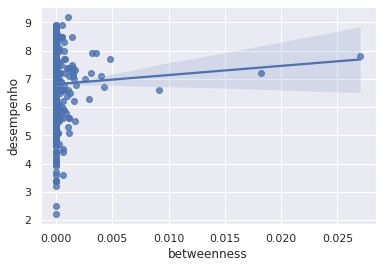

In [83]:
import seaborn as sns
sns.set()

In [88]:
import statsmodels.formula.api as smf

### Agrupamento

<AxesSubplot:xlabel='betweenness', ylabel='desempenho'>

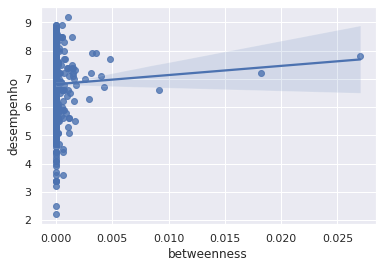

In [84]:
sns.regplot(x=df['betweenness'], y=df['desempenho'])

In [89]:
model = smf.ols(data=df, formula='desempenho ~ betweenness')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             desempenho   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.401
Date:                Thu, 04 Nov 2021   Prob (F-statistic):              0.237
Time:                        02:01:51   Log-Likelihood:                -1365.0
No. Observations:                 974   AIC:                             2734.
Df Residuals:                     972   BIC:                             2744.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.8106      0.032    214.474      0.000       6.748       6.873
betweenness    32.4792     27.438      1.184      0.237     -21.366      86.324
==============================================================================
Omnibus:                       91.392   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.026
Skew:                          -0.689   Prob(JB):                     1.76e-30
Kurtosis:                       4.216   Cond. No.                         871.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Como esperado após a análise dos gráficos, o R² é bem pequeno quando queremos explicar o desempenho levando em conta o __betweenness__. Além disso, podemos ver que o coeficiente é positivo, indicando que existe uma relação positiva, no entanto, o _p\_valor_ é muito grande, ou seja, não podemos rejeitar a hipótese nula de que não há relação.

### Diversidade

<AxesSubplot:xlabel='clustering', ylabel='desempenho'>

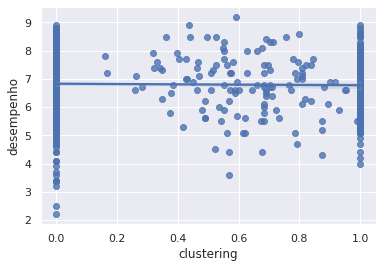

In [85]:
sns.regplot(x=df['clustering'], y=df['desempenho'])

In [90]:
model = smf.ols(data=df, formula='desempenho ~ clustering')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             desempenho   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4827
Date:                Thu, 04 Nov 2021   Prob (F-statistic):              0.487
Time:                        02:02:00   Log-Likelihood:                -1365.5
No. Observations:                 974   AIC:                             2735.
Df Residuals:                     972   BIC:                             2745.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.8287      0.037    184.303      0.000       6.756       6.901
clustering    -0.0550      0.079     -0.695      0.487      -0.210       0.100
==============================================================================
Omnibus:                       92.266   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.493
Skew:                          -0.691   Prob(JB):                     5.12e-31
Kurtosis:                       4.237   Cond. No.                         2.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O R² é desprezível quando queremos explicar o __desempenho__ levando em conta o __clustering__. Além disso, podemos ver que o coeficiente é negativo, indicando que existe uma relação negativa, no entanto, o _p\_valor_ é muito grande, ou seja, também não podemos rejeitar a hipótese nula de que não há relação.

Após analisarmos individualmente a contribuição de cada variável, decidimos testar o impacto da combinação das duas no desempenho do filme.

In [95]:
model = smf.ols(data=df, formula='desempenho ~ betweenness + clustering')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             desempenho   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9730
Date:                Thu, 04 Nov 2021   Prob (F-statistic):              0.378
Time:                        02:16:14   Log-Likelihood:                -1364.7
No. Observations:                 974   AIC:                             2735.
Df Residuals:                     971   BIC:                             2750.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.8249      0.037    183.576      0.000       6.752       6.898
betweenness    33.2187     27.463      1.210      0.227     -20.675      87.112
clustering     -0.0585      0.079     -0.739      0.460      -0.214       0.097
==============================================================================
Omnibus:                       91.770   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.926
Skew:                          -0.687   Prob(JB):                     6.80e-31
Kurtosis:                       4.239   Cond. No.                         902.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Pelo que se pode observar, a contribuição da combinação das variáveis não parece ser suficiente para explicar o desempenho de um filme. A combinação dos coeficientes com seus respectivos _p\_valores_ continua ruim, no entanto, podemos ver uma melhoria ínfima no R².

Portanto, dado que a hipótese era que, de alguma forma, o __agrupamento__ e a __diversidade__ explicavam o __desempenho__, pode-se dizer que a hipótese não se comprova estatisticamente ou que precisaríamos de um refinamento melhor no modelo.